1 . Utilizando a base disponivel em: https://www.kaggle.com/c/titanic/data elabore uma solucao
utilizando dois algoritmos de aprendizagem de maquina do seu conhecimento para classificar se o
passageiro tem o nao chance de sobreviver. Os resultados dessa questao deverao ser descritos
detalhadamente no relatorio atraves de tres pontos principais:

• Analise da base de dados: identificar instancias com atributos incompletos, gerar matriz de
correlacao, identificar a presenca de outliers e verificar se as classes estao balanceadas. O
balanceamento devera ser ilustrado por meio de graficos (e.g. histograma);

• Justifique a escolha dos dois algoritmos de aprendizagem de maquina utilizados e discuta
os resultados obtidos em ambos. Explique porque voce acredita que os algoritmos
escolhidos sao mais apropriados para o problema;

• Analise os resultados considerando matriz de confusao, especificidade, sensibilidade,
medida f1 e acuracia. Descreva detalhadamente os resultados obtidos por cada metrica,
justificando a diferenca entre eles.
Dicas:

• A partir da analise da base de dados, para bons resultados possivelmente sera necessario
pre-processar os dados. Para identificar os outliers, recomenda-se ilustra-los graficamente
(e.g. boxplot).

• Divida (aleatoriamente) o conjunto em treinamento e teste: 80% e 20%, respectivamente.

• Para analisar os resultados de cada metrica, identifique os falsos positivos, falsos
negativos, verdadeiros positivos e verdadeiros negativos.
Bonus: Altere dois parametros de cada algoritmo de aprendizagem de maquina utilizados
na questao e discuta os resultados obtidos. Exemplo: alterar a quantidade de k vizinhos e a
funcao de distancia utilizada, alterar a funcao kernel do SVM, alterar a arquitetura da rede
neural (e.x. camadas e funcao de ativacao, alterar o otimizador e a taxa de aprendizado)

# Questão 1

### 1.Pré-processamento dos dados

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
#Abrindo as bases
dataset_train = pd.read_csv("train.csv")
dataset_test = pd.read_csv("test.csv")

print(pd.options.display.max_columns, pd.options.display.max_rows)
pd.options.display.max_columns = 30
pd.options.display.max_rows = 891

20 60


In [2]:
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Somando as colunas respectivas a numero de familiares

In [6]:
dataset_train['Size_family'] = dataset_train['SibSp'] + dataset_train['Parch']
dataset_train.head(1)
dataset_test['Size_family'] = dataset_test['SibSp'] + dataset_test['Parch']
#dataset_train.head(1)

### Transformando as linhas de ticket com letras em inteiros

In [7]:
dataset_train['Ticket'] = pd.to_numeric(dataset_train['Ticket'], errors='coerce')
dataset_train['Ticket'] = dataset_train['Ticket'].replace(np.nan, 0)
dataset_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Size_family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0.0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0.0,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0.0,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803.0,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450.0,8.0500,NaN,S,0


In [8]:
dataset_test['Ticket'] = pd.to_numeric(dataset_test['Ticket'], errors='coerce')
dataset_test['Ticket'] = dataset_test['Ticket'].replace(np.nan, 0)
dataset_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Size_family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911.0,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272.0,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276.0,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154.0,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298.0,12.2875,NaN,S,2


### Verificando se existem instancias nulas

In [9]:
dataset_train.isnull().values.any()
dataset_test.isnull().values.any()

True

In [10]:
dataset_test.iloc[:,7].isnull().values.any()

False

In [11]:
dataset_train.iloc[:,8].isnull().values.any()

False

### Obtendo a moda de Age e Fare

In [12]:
#moda idade teste
dataset_train.iloc[:,5].mode()

0    24.0
dtype: float64

In [13]:
#moda idade treino
dataset_test.iloc[:,4].mode()

0    21.0
1    24.0
dtype: float64

In [14]:
#moda fare teste
dataset_test.iloc[:,8].mode()

0    7.75
dtype: float64

In [15]:
#moda embarque teste
dataset_train.iloc[:,11].mode()

0    S
dtype: object

### Substituindo valores nulos na coluna idade pela moda

In [16]:
dataset_train['Age'] = dataset_train['Age'].replace(np.nan, 24)
dataset_test['Age'] = dataset_test['Age'].replace(np.nan, 24)

### Substituindo valores nulos na coluna Fare pela moda

In [17]:
dataset_test['Fare'] = dataset_test['Fare'].replace(np.nan, 7.75)

### Substituindo valores nulos na coluna Embarked

In [18]:
dataset_train['Embarked'] = dataset_train['Embarked'].replace(np.nan, 'S')

### Excluindo as colunas Name, Cabin e PassengerId

In [19]:
dataset_train = dataset_train.drop(['Name', 'Cabin', 'PassengerId','SibSp','Parch'], axis=1)
dataset_test = dataset_test.drop(['Name', 'Cabin', 'PassengerId', 'SibSp', 'Parch'], axis=1)
dataset_train.head(1)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Size_family
0,0,3,male,22.0,0.0,7.25,S,1


### One hot enconding

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#base treino
le_train_sex = LabelEncoder()
le_train_embarked = LabelEncoder()
le_train_class = LabelEncoder()
dataset_train['sex_encoded'] = le_train_sex.fit_transform(dataset_train.iloc[:,2].astype(str))
dataset_train['embarked_encoded'] = le_train_embarked.fit_transform(dataset_train.iloc[:,6].astype(str))
dataset_train['class_encoded'] = le_train_class.fit_transform(dataset_train.iloc[:,1].astype(str))

sex_ohe_train = OneHotEncoder(categories='auto')
emb_ohe_train = OneHotEncoder(categories='auto')
class_ohe_train = OneHotEncoder(categories='auto')
X_sex_train = sex_ohe_train.fit_transform(dataset_train.sex_encoded.values.reshape(-1,1)).toarray()
X_emb_train = emb_ohe_train.fit_transform(dataset_train.embarked_encoded.values.reshape(-1,1)).toarray()
X_class_train = class_ohe_train.fit_transform(dataset_train.class_encoded.values.reshape(-1,1)).toarray()


dataset_ohe_train = pd.DataFrame(X_sex_train, columns = ["sex"+str(int(i)) for i in range(X_sex_train.shape[1])])
dataset_train = pd.concat([dataset_train, dataset_ohe_train], axis=1)
dataset_ohe_train = pd.DataFrame(X_emb_train, columns = ["Embark"+str(int(i)) for i in range(X_emb_train.shape[1])])
dataset_train = pd.concat([dataset_train, dataset_ohe_train], axis=1)
dataset_ohe_train = pd.DataFrame(X_class_train, columns = ["Class"+str(int(i)) for i in range(X_class_train.shape[1])])
dataset_train = pd.concat([dataset_train, dataset_ohe_train], axis=1)

dataset_train = dataset_train.loc[:,~dataset_train.columns.duplicated()]
#dataset_train

In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#base test
le_test_sex = LabelEncoder()
le_test_embarked = LabelEncoder()
le_test_class = LabelEncoder()
dataset_test['sex_encoded'] = le_test_sex.fit_transform(dataset_test.iloc[:,1].astype(str))
dataset_test['embarked_encoded'] = le_test_embarked.fit_transform(dataset_test.iloc[:,5].astype(str))
dataset_test['class_encoded'] = le_test_class.fit_transform(dataset_test.iloc[:,0].astype(str))


sex_ohe_test = OneHotEncoder(categories='auto')
emb_ohe_test = OneHotEncoder(categories='auto')
class_ohe_test = OneHotEncoder(categories='auto')
X_sex_test = sex_ohe_test.fit_transform(dataset_test.sex_encoded.values.reshape(-1,1)).toarray()
X_emb_test = emb_ohe_test.fit_transform(dataset_test.embarked_encoded.values.reshape(-1,1)).toarray()
X_class_test = class_ohe_test.fit_transform(dataset_test.class_encoded.values.reshape(-1,1)).toarray()


dataset_ohe_test = pd.DataFrame(X_sex_test, columns = ["sex"+str(int(i)) for i in range(X_sex_test.shape[1])])
dataset_test = pd.concat([dataset_test, dataset_ohe_test], axis=1)
dataset_ohe_test = pd.DataFrame(X_emb_test, columns = ["Embark"+str(int(i)) for i in range(X_emb_test.shape[1])])
dataset_test = pd.concat([dataset_test, dataset_ohe_test], axis=1)
dataset_ohe_test = pd.DataFrame(X_class_test, columns = ["Class"+str(int(i)) for i in range(X_class_test.shape[1])])
dataset_test = pd.concat([dataset_test, dataset_ohe_test], axis=1)

dataset_test = dataset_test.loc[:,~dataset_test.columns.duplicated()]
#dataset_test

### Excluindo as colunas Sex, Embarked e Pclass

In [22]:
dataset_train.head(1)

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Size_family,sex_encoded,embarked_encoded,class_encoded,sex0,sex1,Embark0,Embark1,Embark2,Class0,Class1,Class2
0,0,3,male,22.0,0.0,7.25,S,1,1,2,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [23]:
dataset_train = dataset_train.drop(['Sex', 'Embarked', 'Pclass', 'sex_encoded', 'embarked_encoded', 'class_encoded', 'Ticket'], axis=1)
dataset_test = dataset_test.drop(['Sex', 'Embarked',  'Pclass', 'sex_encoded', 'embarked_encoded', 'class_encoded', 'Ticket'], axis=1)

In [24]:
dataset_train.head(1)

,Survived,Age,Fare,Size_family,sex0,sex1,Embark0,Embark1,Embark2,Class0,Class1,Class2
0,0,22.0,7.25,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [25]:
dataset_test.head(1)

,Age,Fare,Size_family,sex0,sex1,Embark0,Embark1,Embark2,Class0,Class1,Class2
0,34.5,7.8292,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


### Boxplot base de teste

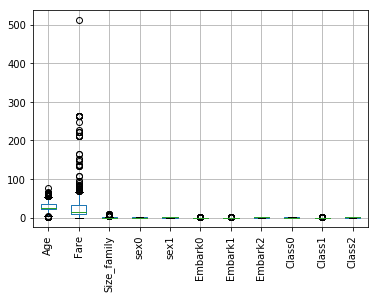

In [26]:
dataset_test.boxplot(rot=90)

### Boxplot base de treino

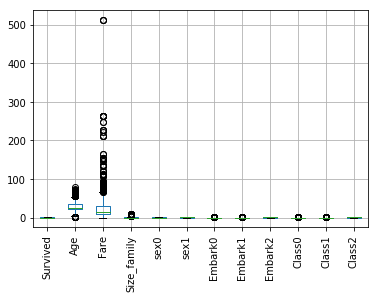

In [27]:
dataset_train.boxplot(rot=90)

In [28]:
dataset_train.isnull().sum()

Survived       0
Age            0
Fare           0
Size_family    0
sex0           0
sex1           0
Embark0        0
Embark1        0
Embark2        0
Class0         0
Class1         0
Class2         0
dtype: int64

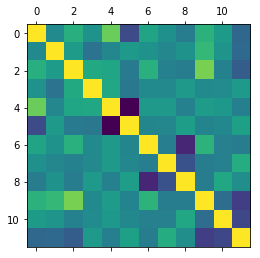

In [29]:
plt.matshow(dataset_train.corr())

In [30]:
corr = dataset_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Age,Fare,Size_family,sex0,sex1,Embark0,Embark1,Embark2,Class0,Class1,Class2
Survived,1,-0.0528722,0.257307,0.016639,0.543351,-0.543351,0.16824,0.00365038,-0.149683,0.285904,0.0933486,-0.322308
Age,-0.0528722,1,0.107554,-0.236339,-0.0733768,0.0733768,0.0258106,-0.0718062,0.0225765,0.329733,0.0370961,-0.314291
Fare,0.257307,0.107554,1,0.217138,0.182333,-0.182333,0.269335,-0.117216,-0.162184,0.591711,-0.118557,-0.413333
Size_family,0.016639,-0.236339,0.217138,1,0.200988,-0.200988,-0.0462153,-0.0585921,0.0773585,-0.046114,-0.038594,0.071142
sex0,0.543351,-0.0733768,0.182333,0.200988,1,-1,0.0828535,0.0741151,-0.119224,0.0980131,0.0647463,-0.137143
sex1,-0.543351,0.0733768,-0.182333,-0.200988,-1,1,-0.0828535,-0.0741151,0.119224,-0.0980131,-0.0647463,0.137143
Embark0,0.16824,0.0258106,0.269335,-0.0462153,0.0828535,-0.0828535,1,-0.148258,-0.782742,0.296423,-0.125416,-0.153329
Embark1,0.00365038,-0.0718062,-0.117216,-0.0585921,0.0741151,-0.0741151,-0.148258,1,-0.499421,-0.155342,-0.127301,0.237449
Embark2,-0.149683,0.0225765,-0.162184,0.0773585,-0.119224,0.119224,-0.782742,-0.499421,1,-0.161921,0.18998,-0.0151043
Class0,0.285904,0.329733,0.591711,-0.046114,0.0980131,-0.0980131,0.296423,-0.155342,-0.161921,1,-0.288585,-0.626738


In [31]:
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# avalia o desempenho do modelo, retornando o valor da precisão
def evaluate_classification_model(model, X, y):
    start = datetime.now()
    kfold = KFold(n_splits=10, random_state=42)
    results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=1)
    end = datetime.now()
    elapsed = int((end - start).total_seconds() * 1000)
    score = 100.0 * results.mean()
    stddev = 100.0 * results.std()
    print(model, '\nScore: %.2f (+/- %.2f) [%5s ms]' % (score, stddev, elapsed))
    return score, stddev, elapsed

In [32]:
dataset_test.shape

(418, 11)

### Separando features & class

In [33]:
#Unindo treino e teste
data = pd.concat([dataset_train, dataset_test])

#Xt = dataset_test.iloc[:, :].values
#yt = dataset_test.iloc[:, [5,6]].values


# definir dados de treino
train_data = data[data.Survived.isnull() == False]

# selecionar atributos para o modelo
cols = ['Class0','Class1','Class2', 'sex0','sex1', 'Age',  'Fare', 'Embark0','Embark1','Embark2',  'Size_family']

X_train = train_data[cols]
y_train = train_data['Survived']

#print('Forma dos dados de treino:', X_train.shape, y_train.shape)

/home/jaqueline/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [34]:
#train_data.corr()

In [35]:
# definir dados de teste
test_data = data[data.Survived.isnull()]

X_test = dataset_test[cols]

print('Forma dos dados de teste:', X_test.shape)

Forma dos dados de teste: (418, 11)


In [36]:
neighbors = list(range(1,50,2))

# criação de intervalo de f para k-fold
cv_list = list(range(10,40))


# criação da estrutura de listas para armazenar valores
k_list = []
fold_list = []
cv_scores = []

for k in neighbors:
  for f in cv_list:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X_train, y_train, cv=f, scoring='accuracy')
      cv_scores.append(scores.mean())  #popular listas
      k_list.append(k)                 
      fold_list.append(f) 

In [37]:
from sklearn.model_selection import train_test_split

predictors = dataset_train.drop(['Survived'], axis=1)
target = dataset_train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

75.13


In [38]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

80.71


/home/jaqueline/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Criando arquivo de saida com as predições dos dois métodos

In [39]:
predictions = knn.predict(dataset_test)
output = pd.DataFrame({'Survived': predictions })
output.to_csv('submission.csv', index=False)
output

,Survived
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,0


In [40]:
predictions = linear_svc.predict(dataset_test)
output_2 = pd.DataFrame({'Survived': predictions })
output_2.to_csv('submission.csv', index=False)
output_2

,Survived
0,0
1,0
2,0
3,0
4,1
5,0
6,1
7,0
8,1
9,0
